# Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин

# Понимание корреляции приводит нас к понятию мультиколлинеарности — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения.
![](Data/img.png)

# Корреляция Пирсона

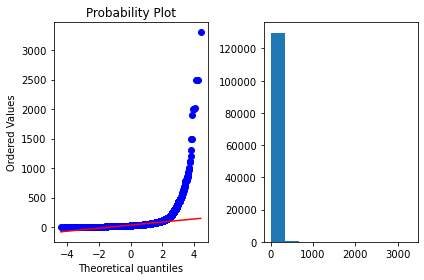

In [1]:
import matplotlib.pyplot as plt # библиотека визуализации
import pandas as pd
import plotly.express as px
from scipy import stats # библиотека для расчетов
df = pd.read_csv('Data/wine_cleared.csv')
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Мы видим, что цена распределена не нормально -> нужно использовать не метод Пирсона для определения корреляции

# Ранговые корреляции
Ранговая корреляция — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.


In [2]:
df.corr(method='spearman')

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


In [3]:
df.corr(method='kendall')

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена.

В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.

In [4]:
from sklearn.metrics import matthews_corrcoef # для бинарных признаков

In [5]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [6]:
df = pd.read_csv('Data/model.csv')
df.head()

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


In [22]:
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [40]:
cr = df.corr()
fig = px.imshow(cr, text_auto=True, width=800)
fig.show()

<AxesSubplot:>

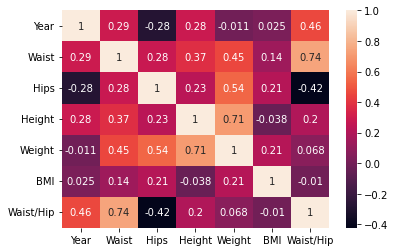

In [9]:
sns.heatmap(df.corr(), annot = True)

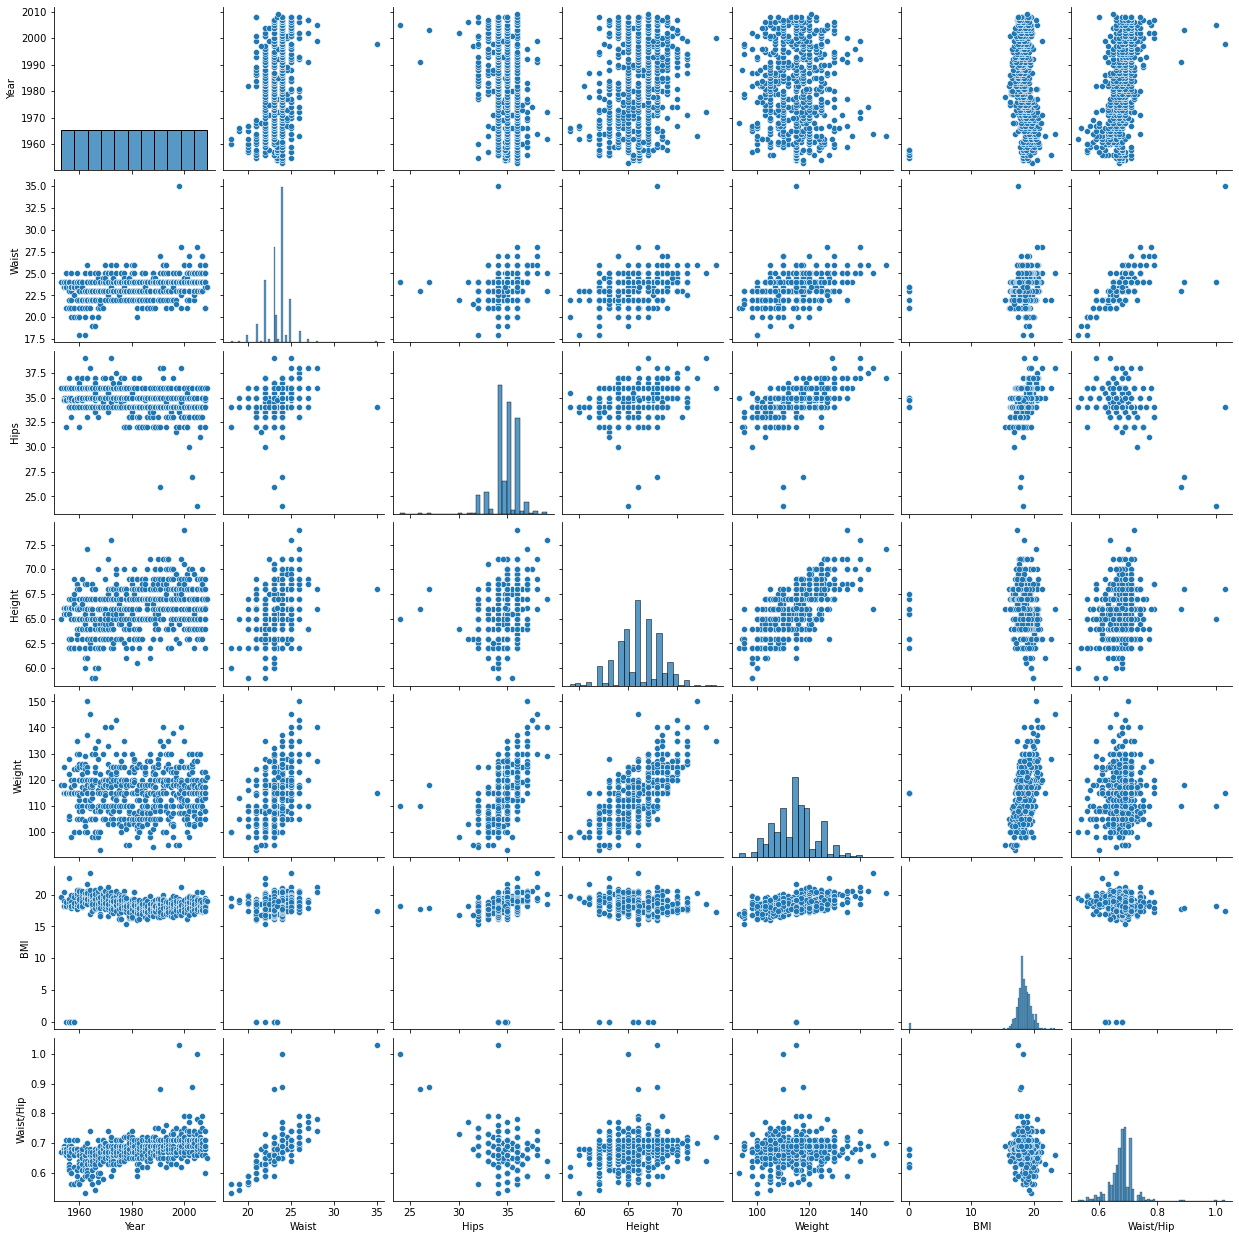

In [45]:
sns.pairplot(df)

In [46]:
df.corr()

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


In [50]:
df['Weight'].mean()

114.93606557377048

In [51]:
df['Height'].mean()

66.05725806451613